In [225]:
from thpoker.core import *
from thpoker.hardcore import hcards, chcombo
import numpy as np
import pandas as pd
import os
import sys
import collections
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
card = Card('As')
print(card, card.name)

A♠ Ace of spades


In [3]:
deck = Deck()

In [4]:
cards = Cards()

In [5]:
cards.pull(deck, 5)

In [12]:
class Shoe(Deck):
    def __init__(self, size):
        self.refresh(size)
    def refresh(self, size):
        self.cards = [Card(w + s) for w in Card.Weight.symbols[1:] for s in Card.Suit.symbols for i in range(size)]

In [1212]:
shoe = Shoe(7)

In [36]:
cards.pull(shoe, 5)

In [38]:
shoe

[2♣, 2♣, 2♣, 2♣, 2♣, 2♣, 2♣, 2♦, 2♦, 2♦, 2♦, 2♦, 2♦, 2♦, 2♥, 2♥, 2♥, 2♥, 2♥, 2♥, 2♥, 2♠, 2♠, 2♠, 2♠, 2♠, 2♠, 2♠, 3♣, 3♣, 3♣, 3♣, 3♣, 3♣, 3♣, 3♦, 3♦, 3♦, 3♦, 3♦, 3♦, 3♦, 3♥, 3♥, 3♥, 3♥, 3♥, 3♥, 3♥, 3♠, 3♠, 3♠, 3♠, 3♠, 3♠, 4♣, 4♣, 4♣, 4♣, 4♣, 4♣, 4♣, 4♦, 4♦, 4♦, 4♦, 4♦, 4♦, 4♦, 4♥, 4♥, 4♥, 4♥, 4♥, 4♥, 4♥, 4♠, 4♠, 4♠, 4♠, 4♠, 4♠, 4♠, 5♣, 5♣, 5♣, 5♣, 5♣, 5♣, 5♦, 5♦, 5♦, 5♦, 5♦, 5♦, 5♦, 5♥, 5♥, 5♥, 5♥, 5♥, 5♥, 5♥, 5♠, 5♠, 5♠, 5♠, 5♠, 5♠, 5♠, 6♣, 6♣, 6♣, 6♣, 6♣, 6♣, 6♣, 6♦, 6♦, 6♦, 6♦, 6♦, 6♦, 6♦, 6♥, 6♥, 6♥, 6♥, 6♥, 6♥, 6♥, 6♠, 6♠, 6♠, 6♠, 6♠, 6♠, 6♠, 7♣, 7♣, 7♣, 7♣, 7♣, 7♣, 7♣, 7♦, 7♦, 7♦, 7♦, 7♦, 7♦, 7♦, 7♥, 7♥, 7♥, 7♥, 7♥, 7♥, 7♥, 7♠, 7♠, 7♠, 7♠, 7♠, 7♠, 7♠, 8♣, 8♣, 8♣, 8♣, 8♣, 8♣, 8♣, 8♦, 8♦, 8♦, 8♦, 8♦, 8♦, 8♦, 8♥, 8♥, 8♥, 8♥, 8♥, 8♥, 8♥, 8♠, 8♠, 8♠, 8♠, 8♠, 8♠, 8♠, 9♣, 9♣, 9♣, 9♣, 9♣, 9♣, 9♣, 9♦, 9♦, 9♦, 9♦, 9♦, 9♦, 9♦, 9♥, 9♥, 9♥, 9♥, 9♥, 9♥, 9♥, 9♠, 9♠, 9♠, 9♠, 9♠, 9♠, 9♠, T♣, T♣, T♣, T♣, T♣, T♣, T♦, T♦, T♦, T♦, T♦, T♦, T♦, T♥, T♥, T♥, T♥, T♥, T♥, T♥, T♠, T♠, T♠, T♠, T♠, T♠, T♠, J♣,

In [130]:
Player = Cards()
Dealer = Cards()

In [951]:
class value():
    def __init__(self, cards, split = False):
        self.cards = [x.weight for x in cards.items]
        self.blackjack = False
        self.soft = False
        self.pair = False
        self.val = self.val_calc()
    def val_calc(self):
        total = 0
        if len(self.cards) in [1, 2] and self.cards[0] == self.cards[1]:
            self.pair = True
        for i in self.cards:
            i = str(i)
            if i not in ['A','K','Q','J','T']:
                total += int(i)
            elif i in ['K','Q','J','T']:
                total += 10
        for i in self.cards:
            i = str(i)
            if i == 'A':
                self.soft = True
                if total > 10:
                    total += 1
                else:
                    total += 11
        if len(self.cards) == 2 and total == 21 and self.pair == False:
            self.blackjack = True
        if total > 21:
            return -1
        return total
    def __str__(self):
        return str(self.val)
    def __repr__(self):
        return str(self.val)

In [404]:
int(str(value(cards)))+12

11

In [239]:
basic_hard = pd.read_csv('basic_hard.csv').set_index('Hard')
basic_soft = pd.read_csv('basic_soft.csv').set_index('Soft')
basic_split = pd.read_csv('basic_split.csv').set_index('Pair')

In [249]:
basic_split

,2,3,4,5,6,7,8,9,T,J,Q,K,A
Pair,,,,,,,,,,,,,
2,Y,Y,Y,Y,Y,Y,N,N,N,N,N,N,N
3,Y,Y,Y,Y,Y,Y,N,N,N,N,N,N,N
4,N,N,N,Y,Y,N,N,N,N,N,N,N,N
5,N,N,N,N,N,N,N,N,N,N,N,N,N
6,Y,Y,Y,Y,Y,N,N,N,N,N,N,N,N
7,Y,Y,Y,Y,Y,Y,N,N,N,N,N,N,N
8,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
9,Y,Y,Y,Y,Y,N,Y,Y,N,N,N,N,N
T,N,N,N,N,N,N,N,N,N,N,N,N,N


In [408]:
basic_soft

,2,3,4,5,6,7,8,9,T,J,Q,K,A
Soft,,,,,,,,,,,,,
12,H,H,H,H,H,H,H,H,H,H,H,H,H
13,H,H,H,H,D,H,H,H,H,H,H,H,H
14,H,H,H,D,D,H,H,H,H,H,H,H,H
15,H,H,H,D,D,H,H,H,H,H,H,H,H
16,H,H,D,D,D,H,H,H,H,H,H,H,H
17,H,D,D,D,D,H,H,H,H,H,H,H,H
18,S,D,D,D,D,S,S,H,H,H,H,H,H
19,S,S,S,S,S,S,S,S,S,S,S,S,S
20,S,S,S,S,S,S,S,S,S,S,S,S,S


In [406]:
basic_soft[str(test.dealer.items[0].weight)]

Soft
12    H
13    H
14    H
15    H
16    H
17    H
18    H
19    S
20    S
21    S
Name: T, dtype: object

In [278]:
repr(test.player.items[0].suit)

'd'

In [298]:
x = Cards(str(test.player.items[0].weight) + repr(test.player.items[0].suit))

In [300]:
y = Cards()

In [301]:
y.pull(shoe,1)

In [308]:
x.items = x.items + y.items

In [309]:
x

[9♦, 6♦]

In [1206]:
class Game():
    def __init__(self, shoe, bet):
        self.player = Cards()
        self.dealer = Cards()
        self.bet = bet
        self.shoe = shoe
        self.payout = []
        self.relative_count = 0
        self.splits = []
        self.resplit_index = 0
        self.win = []
        self.total_bet = 0
    def get_cards(self):
        self.player.pull(self.shoe, 2)
        self.dealer.pull(self.shoe, 2)
    def count_cards(self):
        for i in [x.weight for x in self.player.items]:
            i = str(i)
            if i in ['A','K','Q','J','T']:
                self.relative_count -= 1
            elif i in ['2','3','4','5','6']:
                self.relative_count += 1
        i = self.dealer.items[0].weight
        i = str(i)
        if i in ['A','K','Q','J','T']:
            self.relative_count -= 1
        elif i in ['2','3','4','5','6']:
            self.relative_count += 1
    def play_strategy(self):
        my_value = value(self.player)
        dealer_show = self.dealer.items[0].weight
        dealer_val = value(self.dealer)
        
        if value(self.player).blackjack:
            self.total_bet += self.bet
            self.payout = [1.5*self.bet]
            self.win = [1]
            return
        if value(self.dealer).blackjack or int(str(value(self.player))) == -1:
            self.win = [0]
            self.total_bet = self.bet
            self.payout = [-1*self.bet]
            return
        if value(self.player).pair:
            if basic_split[str(self.dealer.items[0].weight)][str(self.player.items[0].weight)] == 'Y':
                self.split()
                while (len(self.splits)) <= 4:
                    again = False
                    for i in range(len(self.splits)):
                        if value(self.splits[i]).pair and \
                        basic_split[str(self.dealer.items[0].weight)][str(self.splits[i].items[0].weight)] == 'Y':
                            self.resplit_index = i
                            self.resplit()
                            again = True
                    if again == False:
                        break
                for i in self.splits:
                    my_value = value(i)
                    dealer_show = self.dealer.items[0].weight
                    dealer_val = value(self.dealer)
                    action = basic_hard[str(dealer_show)][int(str(my_value))]
                    if my_value.soft:
                        action = basic_soft[str(dealer_show)][int(str(my_value))]
                        
                    while action == 'H':
                        x = Cards()
                        x.pull(self.shoe,1)
                        i.items += x.items
                        my_value = value(i)
                        if int(str(my_value)) == -1:
                            break
                        action = basic_hard[str(dealer_show)][int(str(my_value))]
                        if my_value.soft:
                            action = basic_soft[str(dealer_show)][int(str(my_value))]
                    if action == 'D' and len(self.player.items) == 2:
                        x = Cards()
                        x.pull(self.shoe,1)
                        i.items += x.items
                        self.bet = 2*self.bet
                        self.total_bet += 2*self.bet
                    self.dealer_play()
                    my_value = value(i)
                    dealer_show = self.dealer.items[0].weight
                    dealer_val = value(self.dealer)
                    if int(str(dealer_val)) > int(str(my_value)):
                        self.win += [0]
                        self.payout += [-1*self.bet]
                        self.total_bet += self.bet
                    elif int(str(dealer_val)) < int(str(my_value)):
                        self.win += [1]
                        self.payout += [1*self.bet]
                        self.total_bet += self.bet
                return
        
        action = basic_hard[str(dealer_show)][int(str(my_value))]
        if my_value.soft:
            action = basic_soft[str(dealer_show)][int(str(my_value))]
        if action == 'H':
            self.hit()
        if action == 'D' and len(self.player.items) == 2:
            self.double()
        self.dealer_play()
        my_value = value(self.player)
        dealer_show = self.dealer.items[0].weight
        dealer_val = value(self.dealer)
        if int(str(dealer_val)) > int(str(my_value)):
            self.win = [0]
            self.payout = [-1*self.bet]
            self.total_bet = self.bet
        elif int(str(dealer_val)) < int(str(my_value)):
            self.win = [1]
            self.payout = [1*self.bet]
            self.total_bet = self.bet
        return
               
    def dealer_play(self):
        dealer_val = value(self.dealer)
        if dealer_val.soft:
            while(int(str(dealer_val)) <= 17 and int(str(dealer_val)) != -1):
                x = Cards()
                x.pull(self.shoe,1)
                self.dealer.items += x.items
                dealer_val = value(self.dealer)
        else:
            while(int(str(dealer_val)) < 17 and int(str(dealer_val)) != -1):
                x = Cards()
                x.pull(self.shoe,1)
                self.dealer.items += x.items
                dealer_val = value(self.dealer)
    def hit(self):
        x = Cards()
        x.pull(self.shoe,1)
        self.player.items += x.items
        self.play_strategy()
    def double(self):
        x = Cards()
        x.pull(self.shoe,1)
        self.player.items += x.items
        self.bet = 2*self.bet
        self.total_bet += self.bet
    def split(self):
        x = Cards(str(self.player.items[0].weight) + repr(self.player.items[0].suit))
        y = Cards()
        y.pull(self.shoe,1)
        x.items = x.items + y.items
        self.splits.append(x)
        
        x = Cards(str(self.player.items[1].weight) + repr(self.player.items[1].suit))
        y = Cards()
        y.pull(self.shoe,1)
        x.items = x.items + y.items
        self.splits.append(x)
        
    def resplit(self):
        x = Cards(str(self.splits[self.resplit_index].items[0].weight) + repr(self.splits[self.resplit_index].items[0].suit))
        y = Cards()
        y.pull(self.shoe,1)
        x.items = x.items + y.items
        self.splits.append(x)
        
        x = Cards(str(self.splits[self.resplit_index].items[1].weight) + repr(self.splits[self.resplit_index].items[1].suit))
        y = Cards()
        y.pull(self.shoe,1)
        x.items = x.items + y.items
        self.splits.append(x)
        self.splits.pop(self.resplit_index)
        

In [898]:
test.shoe

[2♣, 2♦, 2♥, 2♥, 3♣, 3♥, 3♥, 3♠, 4♣, 4♣, 4♦, 4♦, 4♥, 4♠, 5♣, 5♣, 5♦, 5♦, 5♦, 5♥, 5♥, 5♠, 5♠, 6♦, 6♥, 6♠, 6♠, 7♣, 7♣, 7♦, 7♥, 7♥, 7♠, 7♠, 7♠, 7♠, 8♣, 8♣, 8♦, 8♦, 8♥, 9♣, 9♣, 9♦, 9♥, 9♥, T♣, T♦, T♦, T♦, T♦, T♥, T♠, J♣, J♣, J♦, J♦, J♦, J♥, J♥, J♥, Q♣, Q♣, Q♦, Q♥, Q♥, Q♠, K♣, K♦, K♦, K♦, A♣, A♣, A♥, A♥, A♠, A♠, A♠]

In [855]:
test = Game(shoe,1)

In [773]:
test.get_cards()

In [774]:
test.dealer

[5♠, 6♦]

In [775]:
test.player

[K♠, 7♦]

In [718]:
test.count_cards()

In [719]:
test.relative_count

1

In [458]:
test.split()

In [ ]:
test.player

In [552]:
test.splits

[]

In [461]:
test.resplit()

In [462]:
test.splits

[[J♥, Q♣], [J♠, 6♠], [K♠, 8♣]]

In [776]:
test.player.items

[K♠, 7♦]

In [720]:
value(test.player)

12

In [555]:
test.double()

In [836]:
test.play_strategy()

In [689]:
test.win

1

In [643]:
value(test.player)

-1

In [1207]:
test = Game(shoe,1)
test.get_cards()
test.play_strategy()
print(test.player)
print(test.dealer)
print(test.bet)
print(test.payout)

[2♣, 3♥, J♥, 7♥]
[T♦, 9♠]
1
[-1]


In [1216]:
test = Game(shoe,1)
test.get_cards()
print(test.player)
print(test.dealer)
print(test.win)

[J♠, 2♠]
[Q♦, A♥]
[]


In [1189]:
test.player = Cards('5h/6c')

In [1217]:
test.play_strategy()
print(test.player)
print(test.dealer)
print(test.bet)
print(test.win)
print(test.payout)

[J♠, 2♠]
[Q♦, A♥]
1
[0]
[-1]


In [1220]:
test.total_bet

1

In [907]:
value(test.player).blackjack

False

In [981]:
test.splits

[[2♥, 4♣, Q♠], [2♣, 3♥, 4♣, 6♣]]

In [847]:
print(test.player)
print(test.dealer)

[2♣, 6♣, A♦]
[2♠, A♠, 5♠]


In [1267]:
def table(num_decks, num_games):
    pay = []
    wins = []
    shoe = Shoe(num_decks)
    length = len(str(shoe))
    total_bet = 0
    count = {}
    for _ in range(num_games):
        x = Game(shoe, 1)
        x.get_cards()
        x.play_strategy()
        pay += x.payout
        wins += x.win
        total_bet += x.total_bet
        if len(str(shoe)) < (2*length/3):
            shoe = Shoe(num_decks)
#     print(sum(pay))
#     print(total_bet)
#     print(str(round(sum(pay)/total_bet*100,4)) + '%')
#     print(str(sum(wins)) + '/' + str(len(wins)))
    return round(sum(pay)/total_bet*100,4)

In [1289]:
table(8,100000)

-1.1411

In [1290]:
percentages = []
for i in range(100):
    percentages.append(table(8,1000))

(array([ 4.,  4.,  8., 17., 16., 20., 12., 10.,  7.,  2.]),
 array([-8.3116 , -6.79882, -5.28604, -3.77326, -2.26048, -0.7477 ,
         0.76508,  2.27786,  3.79064,  5.30342,  6.8162 ]),
 <a list of 10 Patch objects>)

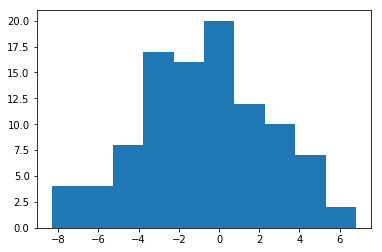

In [1291]:
plt.hist(percentages)

In [1292]:
np.mean(percentages)

-0.7984360000000001

In [1293]:
np.median(percentages)

-0.7055